# PROYECTO FINAL - LIFE EXPECTANCY
### DANIEL CIFUENTES

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv("Life_Expectancy.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print(str(data.shape))

(2938, 22)


In [4]:
print(str(data.shape))

(2938, 22)


### Analisis de Datos

In [5]:
## Analisis de la data
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Transformacion de Variables

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(
 #                       data.drop(['Life expectancy '], axis=1),
  #                      data['Life expectancy '],
   #                     test_size=0.2,
    #                    random_state=2021)

In [8]:
y= data['Life expectancy ']
X=data.drop("Life expectancy ",axis=1)

In [9]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2021)

In [10]:
Xtrain.shape, Xtest.shape

((2350, 21), (588, 21))

### Variables Categoricas

In [11]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars
cat_vars

['Country', 'Status']

In [13]:
Xtrain[cat_vars] = Xtrain[cat_vars].astype('O')
Xtest[cat_vars] = Xtest[cat_vars].astype('O')

C:\Users\Daniel Cifuentes\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
cat_vars_with_na = [var for var in cat_vars 
                        if Xtrain[var].isnull().sum() > 0]
cat_vars_with_na

[]

No tenemos variables categoricas con NA, por lo que no es necesario tratarlas.

## Variables Numericas

In [15]:
num_vars = [var for var in Xtrain.columns if var not in cat_vars and var != ('Life expectancy ')]
num_vars

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

# Tratamiento de Variables con NA

#### Variables Numericas con NA

In [16]:
num_vars_with_na = [var for var in num_vars
                       if Xtrain[var].isnull().sum() > 0]
num_vars_with_na

['Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [17]:
data[num_vars_with_na].isnull().mean().sort_values(ascending=False)

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
 thinness 5-9 years                0.011572
 thinness  1-19 years              0.011572
 BMI                               0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult Mortality                    0.003404
dtype: float64

In [18]:
for var in num_vars_with_na:
    mean_val = Xtrain[var].mean()
    
    print(var, mean_val)
    
    Xtrain[var].fillna(mean_val, inplace=True)
    Xtest[var].fillna(mean_val, inplace=True)

Adult Mortality 167.5533731853117
Alcohol 4.542497708524308
Hepatitis B 80.7594537815126
 BMI  38.22707705553154
Polio 82.42661531878477
Total expenditure 5.9297866419294945
Diphtheria  82.0650406504065
GDP 7699.713130061598
Population 12762256.649939794
 thinness  1-19 years 4.870167886353856
 thinness 5-9 years 4.889453293155406
Income composition of resources 0.6268977016674167
Schooling 11.981278127812788


C:\Users\Daniel Cifuentes\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
Xtrain[num_vars_with_na].isnull().mean()

Adult Mortality                    0.0
Alcohol                            0.0
Hepatitis B                        0.0
 BMI                               0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

Se decide continuar en promediar todas las variables, ya que como estamos hablando de variables para todos los paises del mundo, seria promediar ese registro de un pais al promedio mundial.

### Codificacion Variables Categoricas

In [20]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [21]:
status_mapping = {'Developing':1, 'Developed':2}

var = 'Status'

Xtrain[var] = Xtrain[var].map(status_mapping)
Xtest[var] = Xtest[var].map(status_mapping)

<ipython-input-21-2859105592cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[var] = Xtrain[var].map(status_mapping)
<ipython-input-21-2859105592cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest[var] = Xtest[var].map(status_mapping)


In [22]:
other_cat = ['Country']

In [23]:
#funcion para encontar etiquetas raras
def find_rare_labels_freq(df, var, rare_perc):
    temp = df.groupby(var)[var].count()/len(df)
    return temp[temp > rare_perc].index

In [24]:
def replace_category_vals(train, test, y_train, var, target):
    
    temp = pd.concat([train, ytrain], axis=1) 
    order_labels = temp.groupby([var])[target].mean().sort_values().index
    
    ordinal_values = {k: i for i, k in enumerate(order_labels, 0)}
    
    print(var, ordinal_values)
    
    train[var] = train[var].map(ordinal_values)
    test[var] = test[var].map(ordinal_values)

In [25]:
for var in other_cat:
    replace_category_vals(Xtrain, Xtest, ytrain, var, 'Life expectancy ')

Country {'Sierra Leone': 0, 'Central African Republic': 1, 'Angola': 2, 'Lesotho': 3, "Côte d'Ivoire": 4, 'Malawi': 5, 'Chad': 6, 'Zimbabwe': 7, 'Swaziland': 8, 'Nigeria': 9, 'Mozambique': 10, 'Somalia': 11, 'Cameroon': 12, 'South Sudan': 13, 'Zambia': 14, 'Mali': 15, 'Democratic Republic of the Congo': 16, 'Guinea-Bissau': 17, 'Burkina Faso': 18, 'Uganda': 19, 'Burundi': 20, 'Equatorial Guinea': 21, 'Guinea': 22, 'Botswana': 23, 'Niger': 24, 'United Republic of Tanzania': 25, 'Togo': 26, 'Liberia': 27, 'Kenya': 28, 'South Africa': 29, 'Benin': 30, 'Afghanistan': 31, 'Ethiopia': 32, 'Congo': 33, 'Rwanda': 34, 'Haiti': 35, 'Gambia': 36, 'Djibouti': 37, 'Eritrea': 38, 'Namibia': 39, 'Ghana': 40, 'Papua New Guinea': 41, 'Comoros': 42, 'Sudan': 43, "Lao People's Democratic Republic": 44, 'Senegal': 45, 'Mauritania': 46, 'Gabon': 47, 'Madagascar': 48, 'Yemen': 49, 'Cambodia': 50, 'Myanmar': 51, 'Turkmenistan': 52, 'Timor-Leste': 53, 'Pakistan': 54, 'Kiribati': 55, 'Sao Tome and Principe': 5

<ipython-input-24-8bd5fedfd1f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[var] = train[var].map(ordinal_values)
<ipython-input-24-8bd5fedfd1f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var] = test[var].map(ordinal_values)


# Construccion de Modelo

### Feature Scaling

In [27]:
scaling=MinMaxScaler()
Xtrain=scaling.fit_transform(Xtrain)
Xtest=scaling.transform(Xtest)

In [29]:
Xtrain

array([[0.34736842, 0.13333333, 0.        , ..., 0.33684211, 0.6592827 ,
        0.55072464],
       [0.        , 0.06666667, 0.        , ..., 0.03859649, 0.3185654 ,
        0.33816425],
       [0.72105263, 0.93333333, 0.        , ..., 0.02807018, 0.87025316,
        0.83574879],
       ...,
       [0.52105263, 0.06666667, 0.        , ..., 0.09122807, 0.58755274,
        0.47826087],
       [0.41052632, 0.86666667, 0.        , ..., 0.09824561, 0.6612845 ,
        0.57880571],
       [0.52105263, 0.86666667, 0.        , ..., 0.07017544, 0.64767932,
        0.56038647]])

## Seleccion de Variables

Al ser una variable dependiente lineal, utilizaremos una matriz de correlacion.

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt

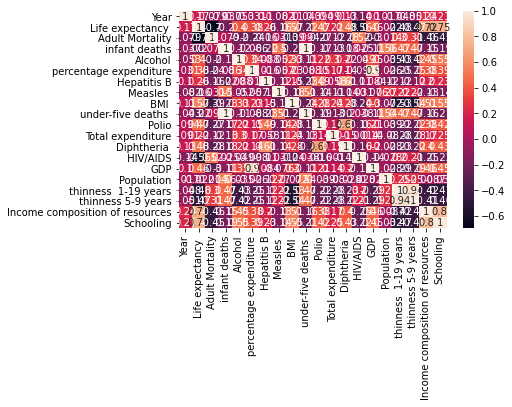

<Figure size 1440x1440 with 0 Axes>

In [31]:
matrix = data.corr()
sn.heatmap(matrix, annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [32]:
selected_features = ['Income composition of resources'] + ['Schooling'] + ['Adult Mortality'] + [' HIV/AIDS']

### Entrenamiento del Modelo

In [40]:
model=LinearRegression()
#model.fit(Xtrain,ytrain)

In [ ]:
model.score(Xtest,ytest)

### GRIDSEARCH

In [37]:
lasso=Lasso()

In [38]:
model1=GridSearchCV(lasso,
                    param_grid={"alpha":[0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,10,50,100,200,300,400,500,600,700,800,1000]},
                    cv=3,
                    return_train_score=True)

In [41]:
model1.fit(Xtrain,ytrain)

In [ ]:
pd.DataFrame(model1.cv_results_).sort_values(by="mean_test_score",ascending=False)

In [ ]:
model2=Lasso(alpha=0.1)
model2.fit(Xtrain,ytrain)

In [ ]:
model2.score(Xtest,ytest)

# MACHINE LEARNING PIPELINE

In [43]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import(
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer
)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder
)

from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

In [44]:
#Mapeos de variables categoricas
STATUS_MAPPINGS = {'Developing':1, 'Developed':2}

#Variables numéricas con NA
NUMERICAL_VARS_WITH_NA = ['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 
                          'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
                          'Income composition of resources', 'Schooling']

#Variables seleccionadas según análisis de Lasso
FEATURES = ['Income composition of resources', 'Schooling', 'Adult Mortality', ' HIV/AIDS']

In [46]:
life_exp_pipeline = Pipeline([
    
    #1. Indicamos Faltante en variables numéricas para imputar
    ('missing_indicator', AddMissingIndicator(variables=NUMERICAL_VARS_WITH_NA)),
    
 #=============== CODIFICACION DE VARIABLES CATEGORICAS ORDINALES ==============
    ('mapper_status', Mapper(variables='Status', mappings=STATUS_MAPPINGS)),
    
    #=========== SCALER ==============
    ('scaler', MinMaxScaler()),
    
    #=========== ENTRENAMIENTO DEL MODELO ============
    #('Lasso', Lasso(alpha=0.01, random_state=2022))
    ('LinearRegression', LinearRegression())
    
])

In [ ]:
X_train_v2 = Xtrain[FEATURES]

In [ ]:
preds = life_exp_pipeline.predict(Xtest)

In [47]:
import joblib
#Guardamos pipeline
joblib.dump(life_exp_pipeline, 'life_exp_pipeline.pkl')

['life_exp_pipeline.pkl']